In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 98.6 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 149.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 170.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 179.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=f58a746006e41f36626867017aa281e4e4a00a14e6728640a07a92e53327b6d0
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show yfinance

Name: yfinance
Version: 0.2.63
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /opt/conda/lib/python3.12/site-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, protobuf, pytz, requests, websockets
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Question 1 - Extracting Tesla Stock Data Using yfinance

In [5]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")

tesla_share_price_data.reset_index(inplace=True)
print(tesla_share_price_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
#Question 3: Use yfinance to Extract Stock Data

In [15]:
import yfinance as yf
import pandas as pd

gamestop = yf.Ticker("GME")

gme_data = gamestop.history(period="max")

gme_data.reset_index(inplace=True)
print("GameStop Stock Data (First 5 Rows):")
print(gme_data.head())

GameStop Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
# Question 5: Plot Tesla Stock Graph

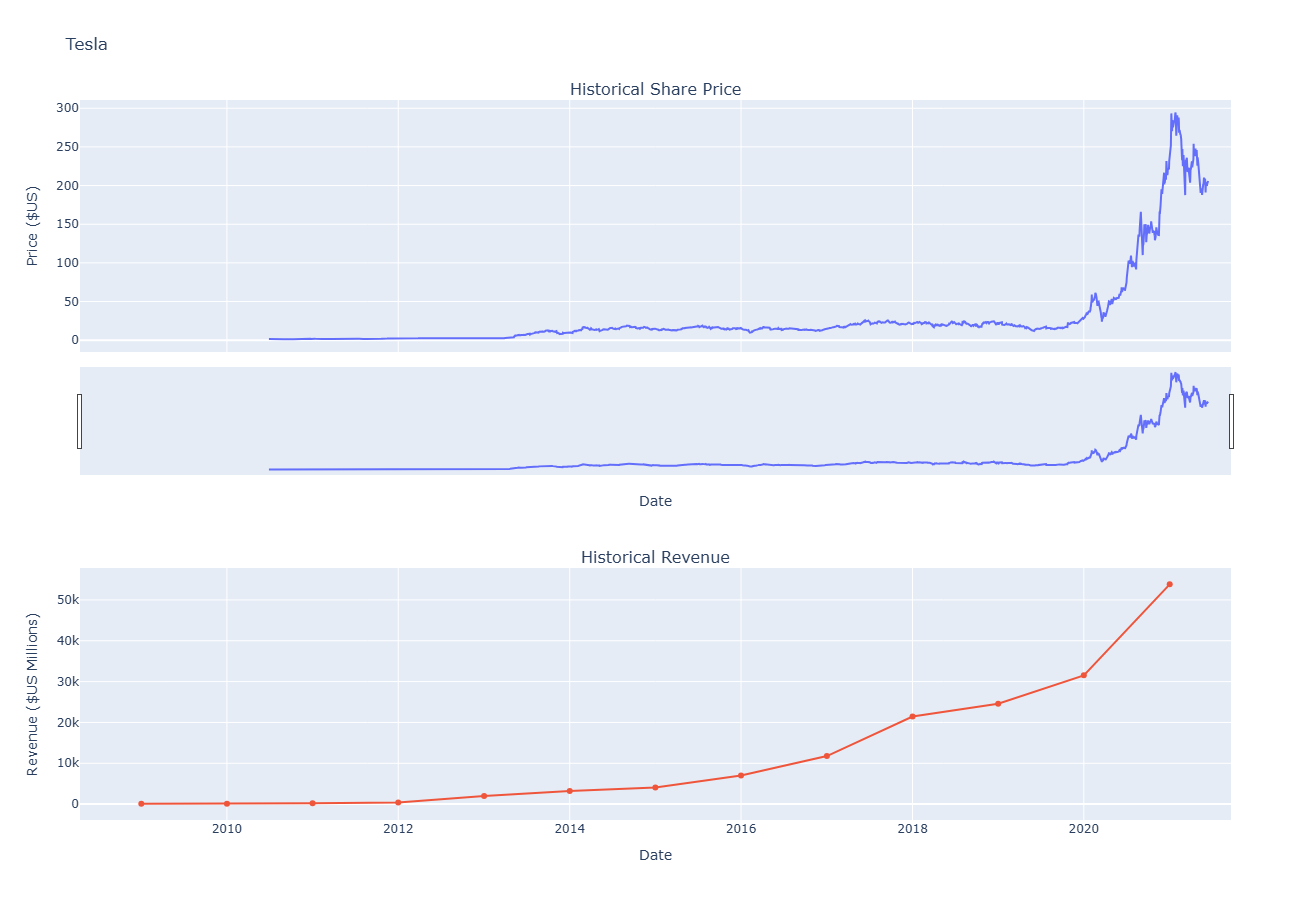

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

# Call the function with Tesla data and title
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [39]:
# Install required libraries
!pip install yfinance pandas requests beautifulsoup4 plotly lxml -q

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from plotly.subplots import make_subplots
import plotly.graph_objects as go

try:
    # Extract GameStop stock data
    gamestop = yf.Ticker("GME")
    gme_data = gamestop.history(period="max")
    gme_data.reset_index(inplace=True)
    gme_data['Date'] = pd.to_datetime(gme_data['Date'])
    print("gme_data verified:", gme_data.head().to_string())

    # Extract GameStop revenue data with enhanced debugging
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, "html.parser")
    revenue_table = soup.find("table", {"class": "historical_data_table"})
    if revenue_table:
        gme_revenue = pd.read_html(str(revenue_table))[0]
        gme_revenue.columns = ['Date', 'Revenue']
        gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
        gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
        # Filter out invalid or NaN revenue values
        gme_revenue = gme_revenue.dropna(subset=['Revenue'])
        print("gme_revenue verified:", gme_revenue.tail().to_string())
    else:
        print("Revenue table not found. Using fallback with limited data.")
        gme_revenue = pd.DataFrame({'Date': [], 'Revenue': []})  # Empty DataFrame as fallback

    # Define the make_graph function with error handling
    def make_graph(stock_data, revenue_data, stock):
        fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
        date_filter_stock = pd.to_datetime('2021-06-14')
        stock_data_specific = stock_data[stock_data.Date <= date_filter_stock]
        date_filter_revenue = pd.to_datetime('2021-04-30')
        revenue_data_specific = revenue_data[revenue_data.Date <= date_filter_revenue] if not revenue_data.empty else pd.DataFrame({'Date': [], 'Revenue': []})
        
        # Ensure data is available for plotting
        if stock_data_specific.empty:
            raise ValueError("No stock data available for the specified period.")
        fig.add_trace(go.Scatter(x=stock_data_specific.Date, y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
        
        if not revenue_data_specific.empty:
            fig.add_trace(go.Scatter(x=revenue_data_specific.Date, y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
        else:
            print("No revenue data available; revenue subplot will be empty.")
            fig.add_trace(go.Scatter(x=[], y=[], name="Revenue"), row=2, col=1)  # Empty trace as placeholder

        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_xaxes(title_text="Date", row=2, col=1)
        fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
        fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
        fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
        fig.show()

    # Call the function with GameStop data and title
    make_graph(gme_data, gme_revenue, 'GameStop')

except Exception as e:
    print(f"Error encountered: {e}")
    raise

gme_data verified:                        Date      Open      High       Low     Close    Volume  Dividends  Stock Splits
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000        0.0           0.0
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600        0.0           0.0
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600        0.0           0.0
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400        0.0           0.0
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800        0.0           0.0
gme_revenue verified:                             Date  Revenue
12 1970-01-01 00:00:00.000002013   8887.0
13 1970-01-01 00:00:00.000002012   9551.0
14 1970-01-01 00:00:00.000002011   9474.0
15 1970-01-01 00:00:00.000002010   9078.0
16 1970-01-01 00:00:00.000002009   8806.0
Error encountered: Invalid comparison between dtype=datetime64[ns, America/New_York] and 

/tmp/ipykernel_364/1921893358.py:27: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



TypeError: Invalid comparison between dtype=datetime64[ns, America/New_York] and Timestamp